In [2]:
import numpy as np
import pandas as pd

In [3]:
train = pd.read_pickle("/kaggle/input/mqttset-models/train_processed.pkl")
test = pd.read_pickle("/kaggle/input/mqttset-models/test_processed.pkl")

print("executado")

executado


In [4]:
columns = [
    'tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.conack.flags',
    'mqtt.conack.flags.reserved', 'mqtt.conack.flags.sp', 'mqtt.conack.val',
    'mqtt.conflag.cleansess', 'mqtt.conflag.passwd', 'mqtt.conflag.qos',
    'mqtt.conflag.reserved', 'mqtt.conflag.retain', 'mqtt.conflag.uname',
    'mqtt.conflag.willflag', 'mqtt.conflags', 'mqtt.dupflag',
    'mqtt.hdrflags', 'mqtt.kalive', 'mqtt.len', 'mqtt.msg', 'mqtt.msgid',
    'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.protoname', 'mqtt.qos',
    'mqtt.retain', 'mqtt.sub.qos', 'mqtt.suback.qos', 'mqtt.ver',
    'mqtt.willmsg', 'mqtt.willmsg_len', 'mqtt.willtopic',
    'mqtt.willtopic_len', 'target'
]

single_value_columns = []

for col in columns:
    if train[col].nunique() == 1:
        single_value_columns.append(col)

print("Colunas com apenas um valor único:")
print(single_value_columns)

train = train.drop(columns=single_value_columns)
print(train.shape)
print("\n")
print(train.columns)

Colunas com apenas um valor único:
['mqtt.conack.flags.reserved', 'mqtt.conack.flags.sp', 'mqtt.conack.val', 'mqtt.conflag.passwd', 'mqtt.conflag.qos', 'mqtt.conflag.reserved', 'mqtt.conflag.retain', 'mqtt.conflag.uname', 'mqtt.conflag.willflag', 'mqtt.retain', 'mqtt.sub.qos', 'mqtt.suback.qos', 'mqtt.willmsg', 'mqtt.willmsg_len', 'mqtt.willtopic', 'mqtt.willtopic_len']
(5600000, 18)


Index(['tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.conack.flags',
       'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.dupflag',
       'mqtt.hdrflags', 'mqtt.kalive', 'mqtt.len', 'mqtt.msg', 'mqtt.msgid',
       'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.protoname', 'mqtt.qos',
       'mqtt.ver', 'target'],
      dtype='object')


In [5]:
columns = [
    'tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.conack.flags',
    'mqtt.conack.flags.reserved', 'mqtt.conack.flags.sp', 'mqtt.conack.val',
    'mqtt.conflag.cleansess', 'mqtt.conflag.passwd', 'mqtt.conflag.qos',
    'mqtt.conflag.reserved', 'mqtt.conflag.retain', 'mqtt.conflag.uname',
    'mqtt.conflag.willflag', 'mqtt.conflags', 'mqtt.dupflag',
    'mqtt.hdrflags', 'mqtt.kalive', 'mqtt.len', 'mqtt.msg', 'mqtt.msgid',
    'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.protoname', 'mqtt.qos',
    'mqtt.retain', 'mqtt.sub.qos', 'mqtt.suback.qos', 'mqtt.ver',
    'mqtt.willmsg', 'mqtt.willmsg_len', 'mqtt.willtopic',
    'mqtt.willtopic_len', 'target'
]

single_value_columns = []

for col in columns:
    if test[col].nunique() == 1:
        single_value_columns.append(col)

print("Colunas com apenas um valor único:")
print(single_value_columns)

test = test.drop(columns=single_value_columns)
print(test.shape)
print("\n")
print(test.columns)

Colunas com apenas um valor único:
['mqtt.conack.flags.reserved', 'mqtt.conack.flags.sp', 'mqtt.conack.val', 'mqtt.conflag.passwd', 'mqtt.conflag.qos', 'mqtt.conflag.reserved', 'mqtt.conflag.retain', 'mqtt.conflag.uname', 'mqtt.conflag.willflag', 'mqtt.retain', 'mqtt.sub.qos', 'mqtt.suback.qos', 'mqtt.willmsg', 'mqtt.willmsg_len', 'mqtt.willtopic', 'mqtt.willtopic_len']
(2400000, 18)


Index(['tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.conack.flags',
       'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.dupflag',
       'mqtt.hdrflags', 'mqtt.kalive', 'mqtt.len', 'mqtt.msg', 'mqtt.msgid',
       'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.protoname', 'mqtt.qos',
       'mqtt.ver', 'target'],
      dtype='object')


In [6]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()


for col in train.columns:
    if train[col].dtype == 'object':
        train[col] = label.fit_transform(train[col].astype(str))
    else:
        train[col] = label.fit_transform(train[col])

for col in test.columns:
    if test[col].dtype == 'object':
        test[col] = label.fit_transform(test[col].astype(str))
    else:
        test[col] = label.fit_transform(test[col])
        
print("executado")

executado


In [7]:
X_train = train.iloc[:,:-1]
y_train = train['target']
X_test = test.iloc[:,:-1]
y_test = test['target']

print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [8]:
# treinamento com modelos ensemble

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

print("executado")

executado


Accuracy train:  0.9204189285714286
Accuracy test:  0.9145995833333334 

Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.96      0.92   1200000
           1       0.96      0.87      0.91   1200000

    accuracy                           0.91   2400000
   macro avg       0.92      0.91      0.91   2400000
weighted avg       0.92      0.91      0.91   2400000
 

Confusion matrix: 
 [[1152736   47264]
 [ 157697 1042303]] 



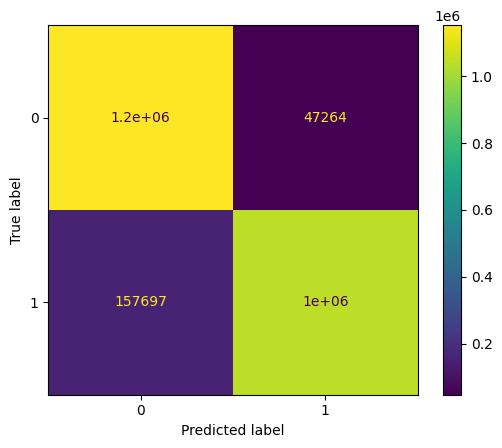

In [9]:
# dt
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("Accuracy train: ", tree.score(X_train, y_train))
print("Accuracy test: ", tree.score(X_test, y_test), "\n")
predict_tree = tree.predict(X_test)
print("Classification report: ")
print(classification_report(y_test, predict_tree), "\n")
matrix_tree = confusion_matrix(y_test, predict_tree)
print("Confusion matrix: \n",matrix_tree, "\n")
cm_tree = confusion_matrix(y_test, predict_tree, labels=tree.classes_)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=tree.classes_)
disp_tree.plot()
plt.show()

Accuracy train:  0.91869875
Accuracy test:  0.9188220833333334 

Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.96      0.92   1200000
           1       0.95      0.88      0.92   1200000

    accuracy                           0.92   2400000
   macro avg       0.92      0.92      0.92   2400000
weighted avg       0.92      0.92      0.92   2400000
 

Confusion matrix:
 [[1150120   49880]
 [ 144947 1055053]] 



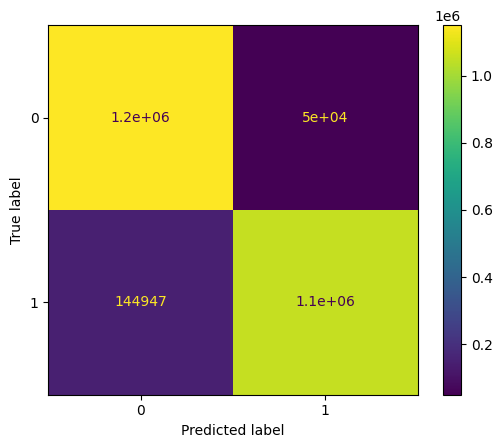

In [10]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
print("Accuracy train: ", gb.score(X_train, y_train))
print("Accuracy test: ", gb.score(X_test, y_test), "\n")

# classification report
predict_gb = gb.predict(X_test)
print("Classification report: ")
print(classification_report(y_test, predict_gb), "\n")

# confusion matrix
matrix_gb = confusion_matrix(y_test, predict_gb)
print("Confusion matrix:\n", matrix_gb, "\n")
cm_gb = confusion_matrix(y_test, predict_gb, labels=gb.classes_)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=gb.classes_)
disp_gb.plot()
plt.show()